## Esercitazione 6  del    27 Marzo 2023 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=1,..,10.
Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
condizionato per tutti i valori di q assegnati;

In [116]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import numpy.linalg as npl
import scipy as sp

In [117]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import numpy.linalg as npl
import scipy as sp

q=sym.symbols('q')
p=sym.symbols('p')

f=-p+sym.sqrt(p**2+q)

df=sym.diff(f,q,1)
print( "Derivata di f : {}".format(df))

fp=f.subs(p,10**5)
dfp=df.subs(p,10**5)

i=np.arange(1,11,1)
vet_q=10.0**(-i)
pnum=10**5

df_numerica= lambdify(q,dfp,np) 
f_numerica=lambdify(q,fp,np)

condizionamento=np.abs(df_numerica(vet_q)*vet_q/f_numerica(vet_q))
print(condizionamento)

sol=f_numerica(vet_q)
print("soluzione ", sol)
print("q =",vet_q)
print("Lo spacing per {}  vale {} ".format(pnum**2,np.spacing(pnum**2)))
#Il problema è malcondizionato per valori di q minori di 1e-6, infatti esplode per valori che rendono nullo il denominatore.
#Il denominatore per valori più  piccoli dello spacing nel sottointervallo dell'asse reale a cui appartiene p^2 si annulla,
# dando luogo ad un valore x=-p+sqrt(p^2)=0. Infatti lo spacing vale  1.9073486328125e-06  e per valori di q più piccoli 
#dello spacing sqrt(p^2+q) viene approssimato a sqrt(p^2). 

Derivata di f : 1/(2*sqrt(p**2 + q))
[0.99999239 0.99999239 1.00174164 1.01058054 1.14532461 0.34359738
        inf        inf        inf        inf]
soluzione  [5.00003807e-07 5.00003807e-08 4.99130692e-09 4.94765118e-10
 4.36557457e-11 1.45519152e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
q = [1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10]
Lo spacing per 10000000000  vale 1.9073486328125e-06 


/tmp/ipykernel_415446/2516877011.py:26: RuntimeWarning: divide by zero encountered in divide
  condizionamento=np.abs(df_numerica(vet_q)*vet_q/f_numerica(vet_q))


## Esercizio 2
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [118]:
#Calcolo della norma 1
def mynorma1(B):
    c=np.sum(np.abs(B),axis=0)  #equivale a sommare gli elementi di tutte le righe 
    #(che equivale a fare la somma degli elementi di ogni colonna)
    n1=np.max(c)
    return n1

## Esercizio 3
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

## Esercizio 4 
Implementare il calcolo dell'indice di condizionamento in norma 2 di una matrice A come rapporto tra la radice dell'autovalore massimo di $A^TA$ e la radice dell'autovalore minimo di $A^TA$.

## Esercizio 5
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma 1 senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1)
- perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [119]:
x = np.arange(1.0, 7.0)
A=np.vander(x, increasing=True)
cond = mynorma1(A)*mynorma1(np.linalg.inv(A))
print("mycond {:e}".format(cond))
condp=np.linalg.cond(A,1)
print("condizionamento in norma 1 con numpy {:e}".format(condp))


mycond 1.281105e+06
condizionamento in norma 1 con numpy 1.281105e+06


In [120]:
b=np.sum(A,axis=1).reshape(6,1) 
bp= b.copy()
bp[0] = bp[0]*0.025
errore_dati=np.linalg.norm(bp-b,np.inf)/np.linalg.norm(b,np.inf)
print("errore dati ",errore_dati)

errore dati  0.0006269424498981888


## Esercizio 6
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [121]:
A=np.array([[6, 63, 662.2],[63, 662.2, 6967.8],[662.2, 6967.8, 73393.5664]])
b=np.array([1.1, 2.33, 1.7])

x = np.linalg.solve(A,b)
Ap=A.copy()
Ap[0,0] = Ap[0,0]*0.01
xp= np.linalg.solve(Ap,b)
err_dati= np.linalg.norm(A-Ap, np.inf)/np.linalg.norm(A, np.inf)
print(err_dati)
err_dati_sol = np.linalg.norm(x-xp, np.inf)/np.linalg.norm(x, np.inf)
print(err_dati_sol)

7.331200370365332e-05
1.0000008284303785


## Esercizio 7
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [122]:
A =sp.linalg.hilbert(4)
b=np.array([1,1,1,1])

x = np.linalg.solve(A,b)

db=np.array([0.01, -0.01, 0.01, -0.01])
bp=b+db

xp=np.linalg.solve(A,bp)

err_dati = np.linalg.norm(db, np.inf)/np.linalg.norm(b,np.inf)
print("Errore relativo sui dati ", err_dati)
print("Errore relativo sui dati  in percentuale", err_dati*100,"%")
err_rel_sol=npl.norm(x-xp,np.inf)/npl.norm(x,np.inf)
print("Errore relativo sulla soluzione", err_rel_sol)
print("Errore relativo sulla soluzione  in percentuale", err_rel_sol*100,"%")

Errore relativo sui dati  0.01
Errore relativo sui dati  in percentuale 1.0 %
Errore relativo sulla soluzione 0.7566666666666716
Errore relativo sulla soluzione  in percentuale 75.66666666666715 %


## Esercizio 8
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$. 

In [123]:
def exp(x, n) :
    risultato=0
    fattoriale =1
    for i in range(1,n+1) :
        fattoriale= fattoriale*i
        risultato += x**i/fattoriale
    return risultato
def exp_stabile(x, n) :
    risultato=0
    fattoriale =1
    if(x<0) :
        x=abs(x)
        for i in range(1,n+1) :
            fattoriale= fattoriale*i
            risultato += x**i/fattoriale
        return 1/risultato

    else :
        for i in range(1,n+1) :
            fattoriale= fattoriale*i
            risultato += x**i/fattoriale
    return risultato

[2.20264658e+04 8.10308393e+03 2.98095799e+03 1.09663316e+03
 4.03428793e+02 1.48413159e+02 5.45981500e+01 2.00855369e+01
 7.38905610e+00 2.71828183e+00 1.00000000e+00 3.67879441e-01
 1.35335283e-01 4.97870684e-02 1.83156389e-02 6.73794700e-03
 2.47875218e-03 9.11881966e-04 3.35462628e-04 1.23409804e-04
 4.53999298e-05]


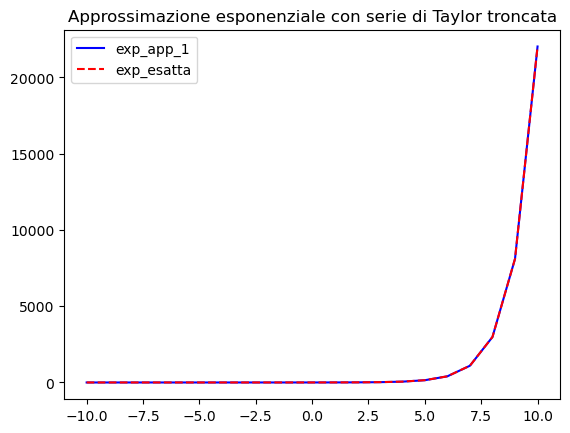

[4.54019910e-05 1.23425036e-04 3.35575201e-04 9.12714253e-04
 2.48491166e-03 6.78365491e-03 1.86573604e-02 5.23956965e-02
 1.56517643e-01 5.81976707e-01 1.00000000e+00 3.67879441e-01
 1.35335283e-01 4.97870684e-02 1.83156389e-02 6.73794700e-03
 2.47875218e-03 9.11881966e-04 3.35462628e-04 1.23409804e-04
 4.53999298e-05]


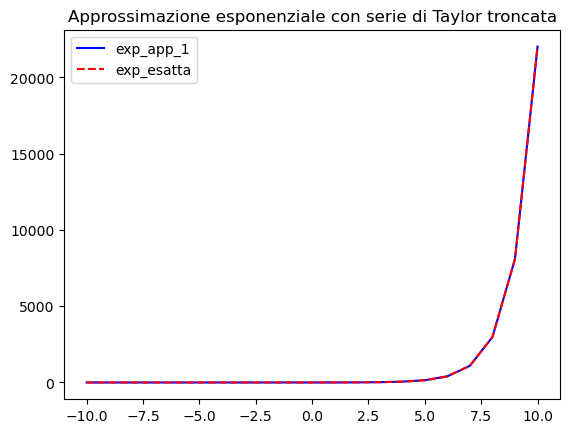

In [124]:
a=-10               
b=10                
ncampio=21
N=100

xc= np.linspace(a,b, ncampio)
exp_es=np.exp(xc); #esponenziale esatto


exp_app=np.zeros((ncampio,)); 
nt=np.zeros((ncampio,));     #indice n della serie

for i in range(ncampio):
    exp_app[i]= exp(xc[i],N)

err_rel=np.abs(exp_app-exp_es)/np.abs(exp_es)
print(err_rel)
plt.plot(xc,exp_app,'b-',xc,exp_es,'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()

exp_app_stabile=np.zeros((ncampio,))

for i in range(ncampio):
    exp_app_stabile[i]= exp_stabile(xc[i],N)


err_rel=np.abs(exp_app_stabile-exp_es)/np.abs(exp_es)
print(err_rel)
plt.plot(xc,exp_app_stabile,'b-',xc,exp_es,'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()

## Esercizio 9
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

[8.74465755e-01 7.94713494e-02 7.80364031e-03 7.78870464e-04
 7.78720525e-05 7.78705223e-06 7.78724808e-07 7.74153481e-08
 5.49671026e-09 9.72442012e-08 1.08237621e-07 2.16305585e-06
 8.00296731e-05 1.35834308e-03 6.86092981e-03 2.74091121e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


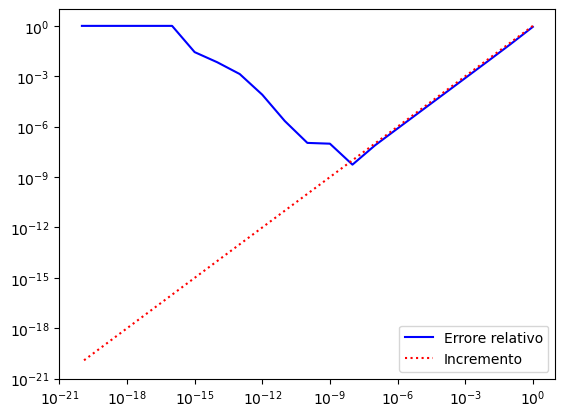

In [128]:
import math
k=np.arange(0,-21,-1)
h=10.0**k
x=1
es = math.cos(1)
rap = (np.sin(x+h)- np.sin(x))/h
err_rel = np.abs(es-rap)/np.abs(es)
print(err_rel)

plt.plot(h,err_rel,'b-',h,h,'r:')
plt.xscale("log")
plt.yscale("log")
plt.legend(['Errore relativo', 'Incremento'])